<h1> K Means Clustering </h1> 

### Table of Content

1. [Data Description](#dd)
2. [Importing the dataset and packages](#import)
3. [Exploratory Data Analysis](#eda)
4. [Finding Clusters with Elbow Method](#elbow)
5. [Building K Means model](#Kmeans)

### 1. Data Description  <a id='dd'>

**Iris data**
Iris is flower having many medicinal importance such as
- Its oil is used as sedative
- Its dried rhizomes help babies in teething <br>
In this dataset we have provided 150 measurements of iris and we try to determine the species of the flower.

**Attributes**  
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
    

**Objective** 

To create clusters of iris flower based on the given attributes.


### 2. Importing the packages and dataset  <a id='import'>

In [1]:
# Importing the packages

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [9]:
# Importing the dataset

iris=pd.read_csv("iris.csv")

In [10]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# Checking the null values in the dataset

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 3. Exploratory Data Analysis  <a id='eda'>

#### Box Plot

<Axes: xlabel='species', ylabel='sepal_length'>

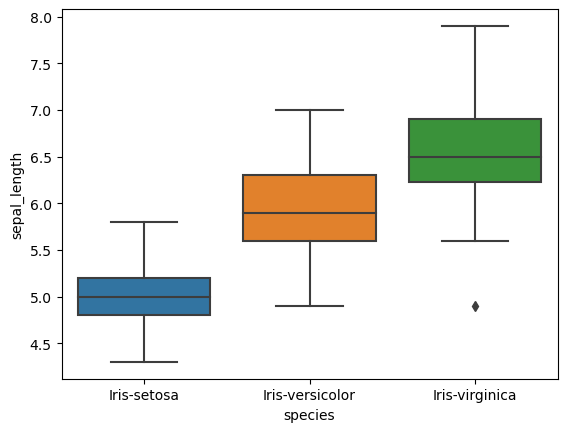

In [15]:
# This shows how comparision of sepal length for different species

sns.boxplot(x = 'species', y='sepal_length', data = iris)

<Axes: xlabel='species', ylabel='sepal_width'>

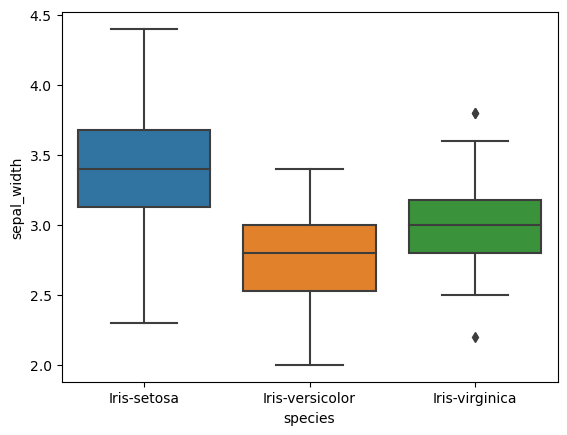

In [16]:
# This shows how comparision of sepal width for different species

sns.boxplot(x = 'species', y='sepal_width', data = iris)

<Axes: xlabel='species', ylabel='petal_length'>

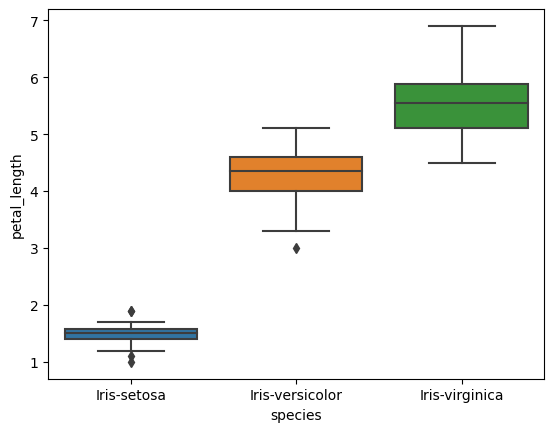

In [17]:
# This shows how comparision of petal length for different species

sns.boxplot(x = 'species', y='petal_length', data = iris)

<Axes: xlabel='species', ylabel='petal_width'>

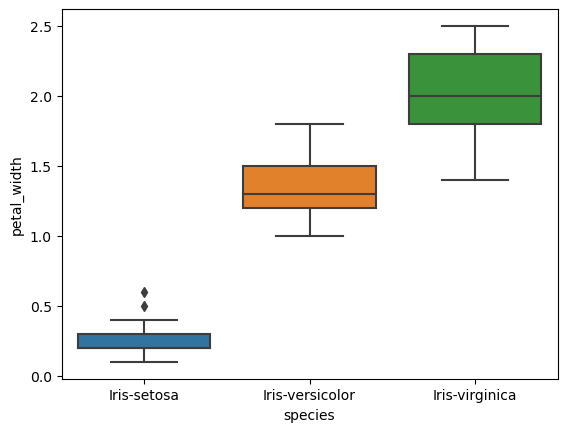

In [18]:
# This shows how comparision of petal width for different species

sns.boxplot(x = 'species', y='petal_width', data = iris)

#### Correlation plot

C:\Users\aruns\AppData\Local\Temp\ipykernel_23984\3687164669.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


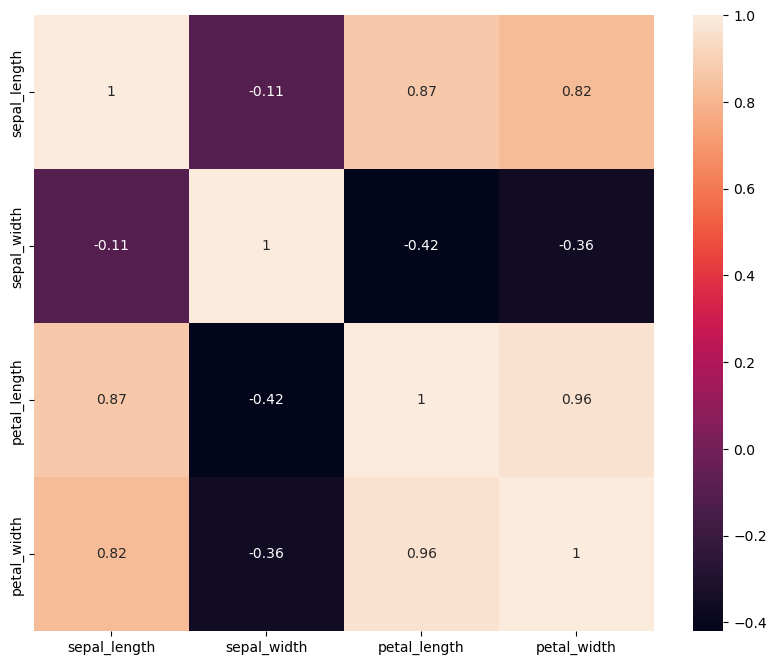

In [19]:
figsize=[10,8]
plt.figure(figsize=figsize)
sns.heatmap(iris.corr(),annot=True)
plt.show()

** Strong positive correlation between ** <br>
sepal length -- petal length <br>
sepal length -- petal width <br>
petal length -- petal width <br>

#### Histogram

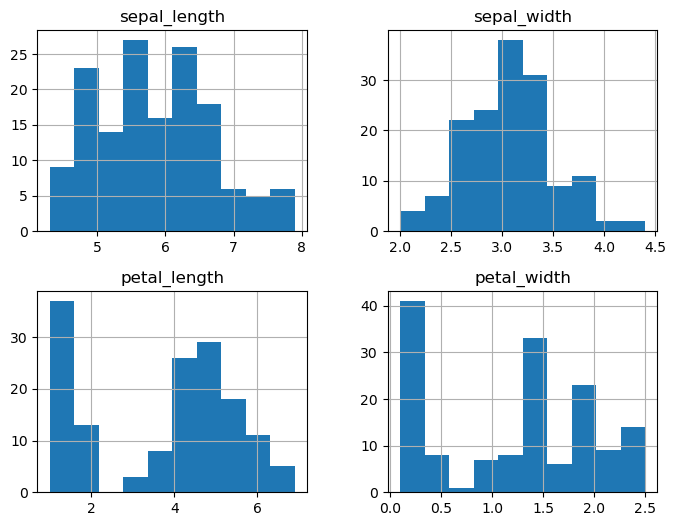

In [20]:
## Shows distribution of the variables
iris.hist(figsize=(8,6))
plt.show()

There is not much variance between the columns. We don't have to perform any scaling.

#### Pairplot

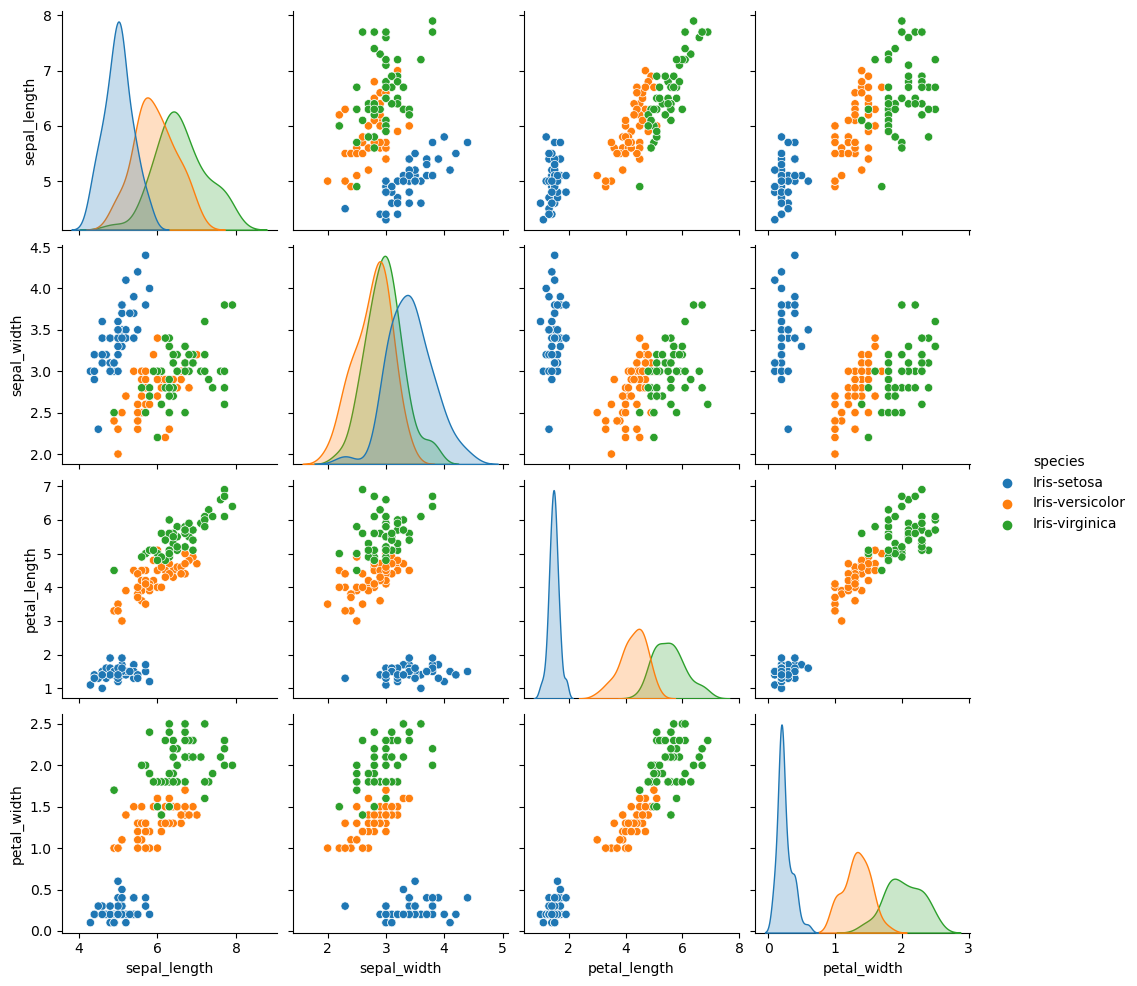

In [21]:
sns.pairplot(iris, hue='species')

** Setosa ** is easily separable using most of the columns.

** We will drop the 'species' column as it is object type which can't be used in clustering**

In [22]:
iris.drop(['species'],axis = 1, inplace=True)

### 4. Finding Clusters with Elbow Method  <a id='elbow'>

In [23]:
ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    model=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(iris)
    ssw.append(model.inertia_)

C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [24]:
ssw_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":ssw})
print(ssw_df)

   no. of clusters         SSW
0                1  680.824400
1                2  152.368706
2                3   78.940841
3                4   57.317873
4                5   46.561630
5                6   38.930963
6                7   34.190688
7                8   30.063874
8                9   27.879288


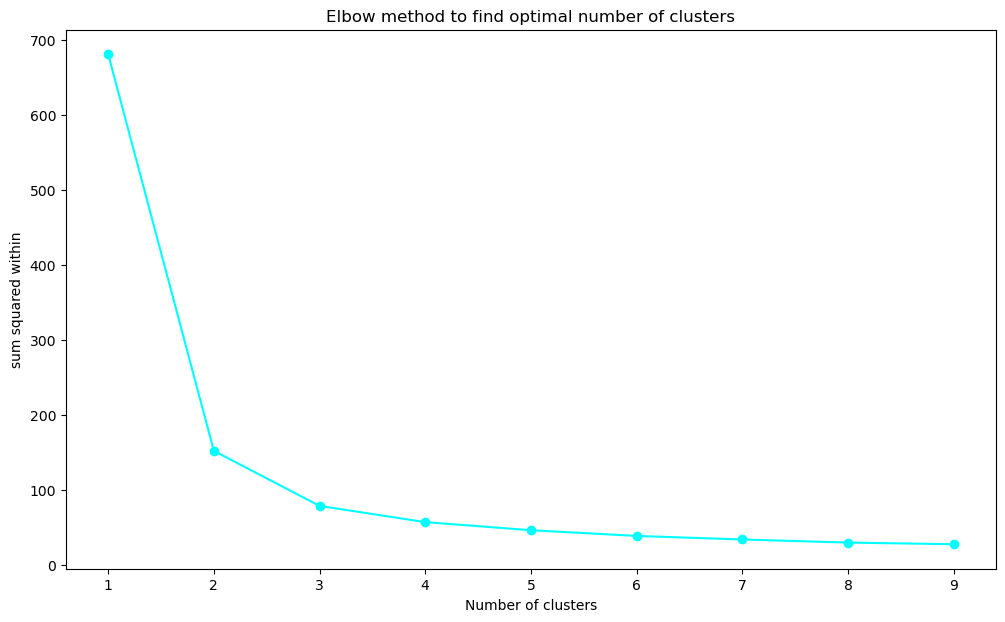

In [25]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = "o",color="cyan")
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

** Please notice that we spotted the elbow when number of clusters is 3 and after 3rd cluster there is no significant change in ssw. **

### 5. Building K Means model  <a id='Kmeans'>

In [26]:
# We'll continue our analysis with n_clusters=3
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, random_state = 42)
# Fit the model
k_model=kmeans.fit(iris)

C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
## It returns the cluster vectors i.e. showing observations belonging which clusters 
clusters=k_model.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

** So the observations belongs to 3 clusters ** <br>
This is very similar to the 3 species which the flowers belong to.

In [28]:
iris['clusters']=clusters
print(iris.head())
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width  clusters
0           5.1          3.5           1.4          0.2         1
1           4.9          3.0           1.4          0.2         1
2           4.7          3.2           1.3          0.2         1
3           4.6          3.1           1.5          0.2         1
4           5.0          3.6           1.4          0.2         1
     sepal_length  sepal_width  petal_length  petal_width  clusters
145           6.7          3.0           5.2          2.3         2
146           6.3          2.5           5.0          1.9         0
147           6.5          3.0           5.2          2.0         2
148           6.2          3.4           5.4          2.3         2
149           5.9          3.0           5.1          1.8         0


Cluster 0 -- versicolor <br>
Cluster 1 -- Setosa <br>
Cluster 2 -- Virginica <br>

<Axes: xlabel='clusters', ylabel='petal_width'>

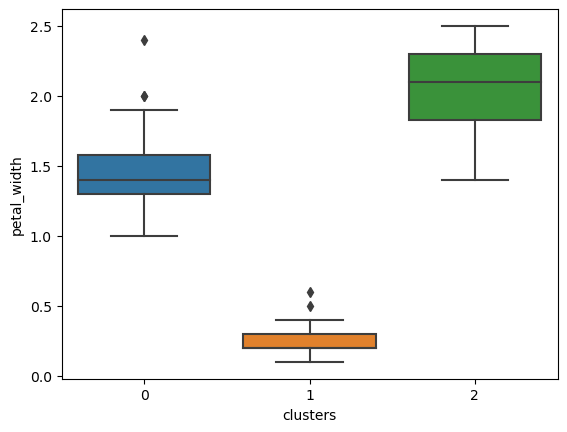

In [29]:

sns.boxplot(x = 'clusters', y='petal_width', data = iris)

<Axes: xlabel='clusters', ylabel='petal_length'>

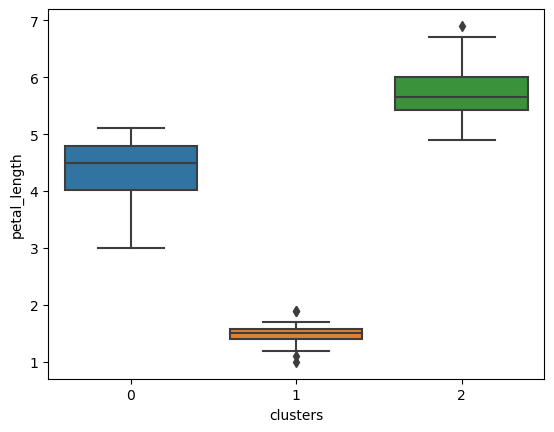

In [30]:
sns.boxplot(x = 'clusters', y='petal_length', data = iris)

In [31]:
## Size of each cluster
iris['clusters'].value_counts()

0    62
1    50
2    38
Name: clusters, dtype: int64

In [32]:
# Centroid of each clusters
centroid_df = pd.DataFrame(k_model.cluster_centers_, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
centroid_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


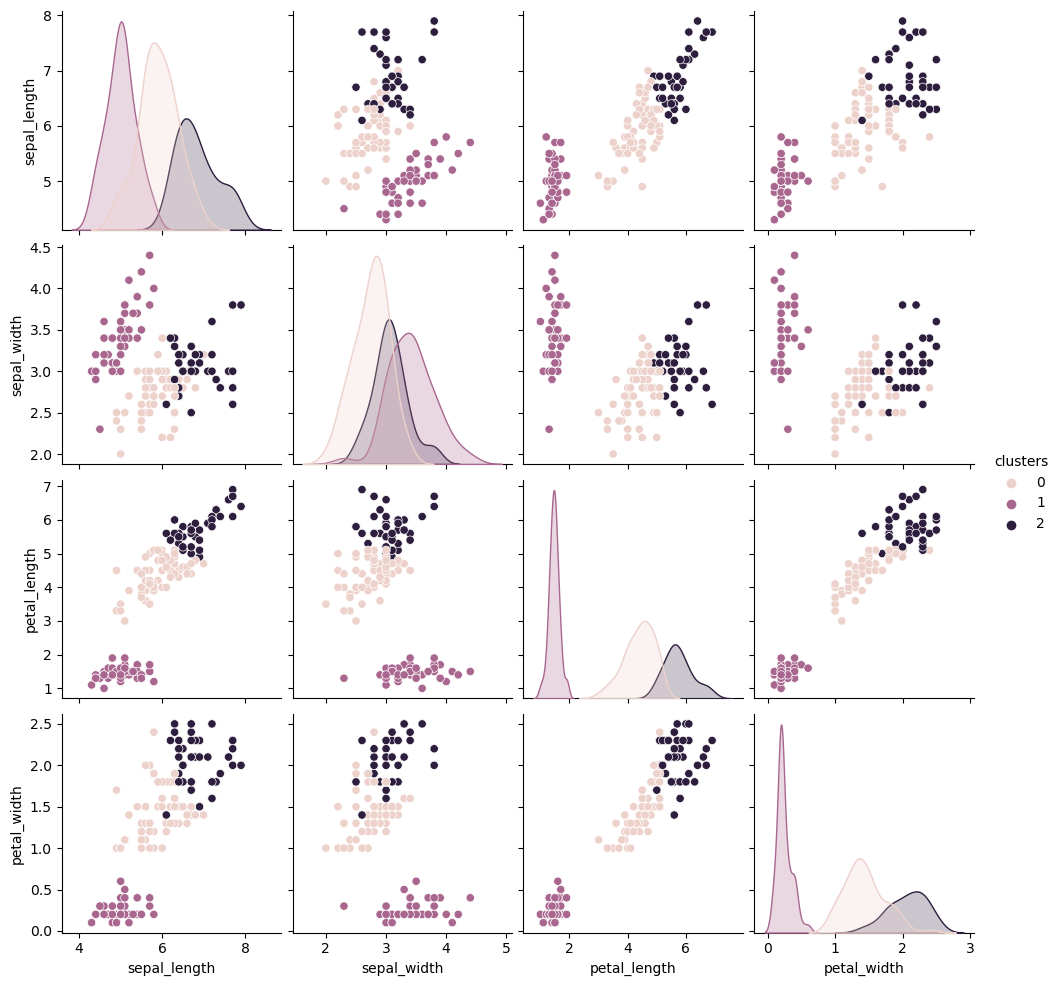

In [33]:
### Visualizing the cluster based on each pair of columns

sns.pairplot(iris, hue='clusters')

#### The End